In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (8,6)}, style='ticks', context='notebook')

In [4]:
car_adverts = pd.read_csv("C:/Users/TOPAZ EMERALD/Downloads/adverts.csv")

In [5]:
#set the public reference column as the index
car_adverts = car_adverts.set_index('public_reference')

In [6]:
numeric_columns = car_adverts.select_dtypes(include=np.number)
categorical_columns = car_adverts.select_dtypes(include=['object'])

In [7]:
#divide the dataset into old and new cars
Old_cars = car_adverts.loc[car_adverts['vehicle_condition'] =='USED'].copy()
New_cars = car_adverts.loc[car_adverts['vehicle_condition'] =='NEW'].copy()

In [8]:
incorrrect = Old_cars[Old_cars['reg_code'].isin(['94', '85', 'CA',  '723xuu', '95', '38',  '37', 's', 'k', 'p', 'm', 'FW'])].index

In [9]:
#drop the noise in the registration column of the Old cars subset
Old_cars.drop(incorrrect , inplace=True)

In [10]:
cols = ['mileage', 'price']
#Outliers are identified and deleted
Q1 = Old_cars[cols].quantile(0.25)
Q3 = Old_cars[cols].quantile(0.75)
IQR = Q3 - Q1
Old_cars = Old_cars[~((Old_cars[cols] < (Q1 - 1.5*IQR)) | (Old_cars[cols] > (Q3 + 1.5*IQR))).any(axis = 1)]

In [11]:
#fill in the missing values in the mileage column with the mean
Old_cars['mileage'].fillna((Old_cars['mileage'].mean()), inplace=True)

In [12]:
#identify and delete rows with null registration code and year of registration
No_reg_no_yor = Old_cars[(Old_cars['reg_code'].isna()) & (Old_cars['year_of_registration'].isna())].index

In [13]:
Old_cars.drop(No_reg_no_yor,inplace=True)

In [14]:
#identify and delete rows with null registration codes and years of registration that cannot be reverse engineered
No_corr_yor = Old_cars[Old_cars['year_of_registration'].isin([1962, 1933, 1961,  1957, 1954, 1955,  1960, 1956, 1959, 1958, 1950, 1952]) & (Old_cars['reg_code'].isnull())].index

In [15]:
Old_cars.drop(No_corr_yor, inplace=True)

In [16]:
#create a dictionary with year of registration as the key and the corresponding registration code as the value
dictionary = {2000:'X', 1998:'S', 1997:'R', 1999:'T', 1988:'F', 1963:'A', 1964:'B', 1991:'H', 1990:'G', 1992:'J', 1966:'D', 1994:'L', 1973:'M', 1987:'E', 1995:'N', 2001:'Y', 2019:'19', 2006:'06', 2004:'04', 2017:'17', 2018:'18', 2020:'20', 2005:'05', 2015:'15', 2007:'07', 2010:'10', 2009:'09', 2013:'13', 2012:'12', 2008:'08', 2016:'16', 2002:'02', 2014:'14', 2011:'11', 2003:'03'}

In [17]:
#map the missing values in the registration code column using the dictionary
Old_cars['reg_code'] = Old_cars['reg_code'].fillna(Old_cars['year_of_registration'].map(dictionary))

In [18]:
#create a dictionary with year of registration as the value and the corresponding registration code as the key
dictionary2 = {'18':2018, '20':2020, 'E':1987, '11':2011, 'H':1990, '61':2011, '15':2015, '63':2013, '07':2007, 'S':1998, '66':2016,
              '56':2006, 'R':1997, '08':2008, '03':2003, '17':2017, 'B':1984, '12':2012, '06':2006, '52':2002, '68':2018, '14':2014,
              '51':2001, '57':2007, 'N':1995, '70':2020, '16':2016, '13':2013, '58':2008, 'F':1988, '55':2005, 'P':1996, '54':2004,
              'C':1985, 'T':1999, '67':2017, '19':2019, '09':2009, 'Y':2001, 'V':1999, '65':2015, '64':2014, '10':2010, '05':2005,
              '02':2002, '69':2019, '59':2009, 'L':1994, 'M':1994, '53':2003, '62':2012, '60':2010, '04':2004, 'J':1991, 'G':1989,
              'D':1986, 'A':1983}

In [19]:
#map the missing values in the year of registration column using the dictionary
Old_cars['year_of_registration'] = Old_cars['year_of_registration'].fillna(Old_cars['reg_code'].map(dictionary2))

In [20]:
grouped = Old_cars.groupby('standard_model')

# calculate the mode of 'standard_colour' for each group
modes = grouped['standard_colour'].apply(lambda x: x.mode()[0] if x.mode().empty == False else None)

# fill in missing values in 'standard_colour' column using the mode dictionary
Old_cars['standard_colour'].fillna(Old_cars['standard_model'].map(modes), inplace=True)

In [21]:
grouped = Old_cars.groupby('standard_model')

# calculate the mode of 'body_type' for each group
modes = grouped['body_type'].apply(lambda x: x.mode()[0] if x.mode().empty == False else None)

# fill in missing values in 'body_type' column using the mode dictionary
Old_cars['body_type'].fillna(Old_cars['standard_model'].map(modes), inplace=True)

In [22]:
grouped = Old_cars.groupby('standard_model')

# calculate the mode of 'standard_colour' for each group
modes = grouped['fuel_type'].apply(lambda x: x.mode()[0] if x.mode().empty == False else None)

# fill in missing values in 'standard_colour' column using the mode dictionary
Old_cars['fuel_type'].fillna(Old_cars['standard_model'].map(modes), inplace=True)

In [23]:
#calculate the mode of 'standard_colour'
mode = Old_cars['standard_colour'].mode()[0]

# fill in missing values in 'standard_colour' column with the mode
Old_cars['standard_colour'].fillna(mode, inplace=True)

In [24]:
#calculate the mode of 'body_type'
mode = Old_cars['body_type'].mode()[0]

# fill in missing values in 'body_type' column with the mode
Old_cars['body_type'].fillna(mode, inplace=True)

In [25]:
#calculate the mode of 'standard_colour'
mode = Old_cars['fuel_type'].mode()[0]

# fill in missing values in 'standard_colour' column with the mode
Old_cars['fuel_type'].fillna(mode, inplace=True)

In [26]:
New_cars.fillna({'reg_code': 0, 'year_of_registration': '2020'}, inplace=True)

In [27]:
grouped = New_cars.groupby('standard_model')

# calculate the mode of 'standard_colour' for each group
modes = grouped['standard_colour'].apply(lambda x: x.mode()[0] if x.mode().empty == False else None)

# fill in missing values in 'standard_colour' column using the mode dictionary
New_cars['standard_colour'].fillna(New_cars['standard_model'].map(modes), inplace=True)

In [28]:
grouped = New_cars.groupby('standard_model')

# calculate the mode of 'standard_colour' for each group
modes = grouped['body_type'].apply(lambda x: x.mode()[0] if x.mode().empty == False else None)

# fill in missing values in 'standard_colour' column using the mode dictionary
New_cars['body_type'].fillna(New_cars['standard_model'].map(modes), inplace=True)

In [29]:
grouped = New_cars.groupby('standard_model')

# calculate the mode of 'standard_colour' for each group
modes = grouped['fuel_type'].apply(lambda x: x.mode()[0] if x.mode().empty == False else None)

# fill in missing values in 'standard_colour' column using the mode dictionary
New_cars['fuel_type'].fillna(New_cars['standard_model'].map(modes), inplace=True)

In [30]:
#calculate the mode of 'standard_colour'
mode = New_cars['standard_colour'].mode()[0]

# fill in missing values in 'standard_colour' column with the mode
New_cars['standard_colour'].fillna(mode, inplace=True)

In [31]:
# calculate the upper and lower bounds of the outliers
q1, q3 = New_cars['price'].quantile([0.25, 0.75])
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# remove rows with values outside the bounds
New_cars = New_cars[(New_cars['price'] < upper_bound) & (New_cars['price'] > lower_bound)]

In [32]:
frames = [Old_cars, New_cars]

In [33]:
#concatenate the old cars and new cars into a new dataframe called auto_trader
auto_trader = pd.concat(frames)

In [34]:
#change the datatype of the mileage column to integer
auto_trader['mileage'] = auto_trader['mileage'].astype(int)

In [35]:
#change the datatype of the year of registration column to integer
auto_trader['year_of_registration'] = auto_trader['year_of_registration'].astype(int)

In [36]:
#create a new column called car_age by subtracting 2020 from the year of registration
year = 2020
auto_trader['car_age'] = year - auto_trader['year_of_registration']

In [37]:
#use stratified sampling to take a sample of the dataset for modelling
auto_trader_sample = auto_trader.groupby("standard_model", group_keys=False).apply(lambda x:x.sample(frac=0.1))

In [38]:
auto_trader_sample.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type', 'car_age'],
      dtype='object')

In [39]:
!pip install category_encoders

In [40]:
!pip install shap

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from category_encoders import TargetEncoder
from sklearn.inspection import PartialDependenceDisplay
import shap

In [42]:
target_encode_features = ["standard_colour", "standard_make", "standard_model", "body_type", 
                          "fuel_type", "vehicle_condition", "crossover_car_and_van"]
encoder = TargetEncoder(cols=target_encode_features)
encoder.fit(auto_trader_sample, auto_trader_sample["price"])
auto_trader_target = encoder.transform(auto_trader_sample)

<AxesSubplot:>

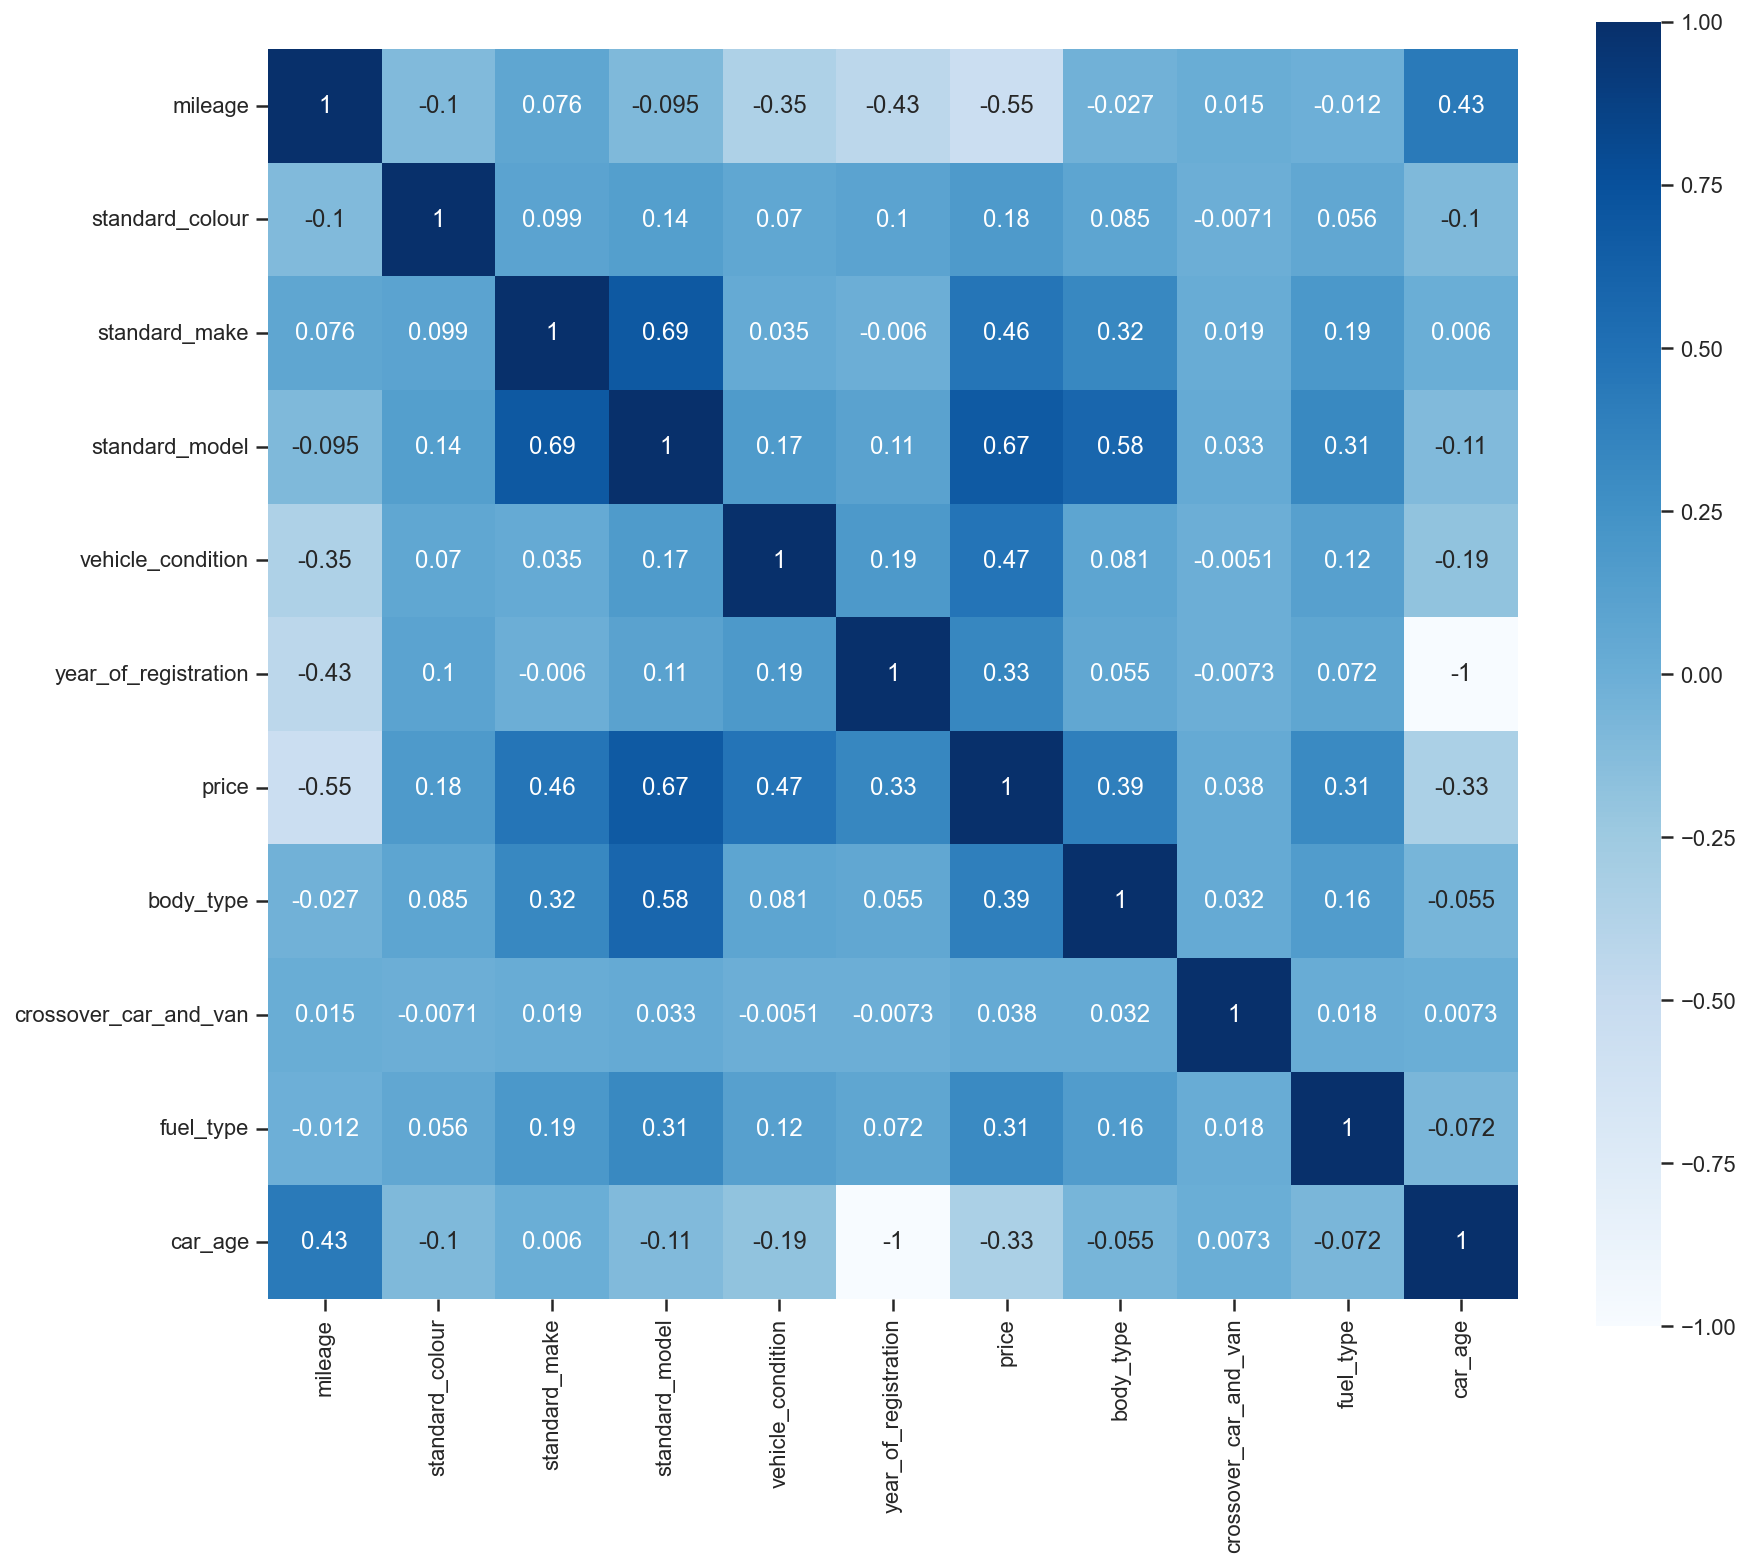

In [43]:
# Correlation matrix heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(auto_trader_target.corr(), square=True, annot=True, cmap='Blues')

In [44]:
auto_trader_target = auto_trader_target.drop(columns=['reg_code', 'year_of_registration', 'standard_colour'])

In [45]:
X = auto_trader_target.drop('price', axis=1)
y = auto_trader_target['price']

In [46]:
preprocessing_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
    ]
).set_output(transform='pandas')

In [47]:
!pip install --upgrade scikit-learn==1.2.0

In [48]:
preprocessing_pipe.fit_transform(X).head()

,mileage,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type,car_age,mileage standard_make,mileage standard_model,...,vehicle_condition body_type,vehicle_condition crossover_car_and_van,vehicle_condition fuel_type,vehicle_condition car_age,body_type crossover_car_and_van,body_type fuel_type,body_type car_age,crossover_car_and_van fuel_type,crossover_car_and_van car_age,fuel_type car_age
public_reference,,,,,,,,,,,,,,,,,,,,,
202010315650267,-1.106093,0.840496,-0.162375,-0.295733,-0.995283,-0.057956,-0.560490,0.484301,-0.929667,0.179602,...,0.294338,0.017139,0.165756,-0.143224,0.057683,0.557847,-0.482017,0.032484,-0.028068,-0.271446
202008162544708,1.793898,0.840496,-0.162375,-0.295733,-0.995283,-0.057956,-0.560490,0.763751,1.507764,-0.291284,...,0.294338,0.017139,0.165756,-0.225867,0.057683,0.557847,-0.760149,0.032484,-0.044264,-0.428075
202007161320366,-0.570732,0.840496,-0.162375,-0.295733,-0.995283,-0.057956,0.298749,-0.214323,-0.479698,0.092672,...,0.294338,0.017139,-0.088350,0.063383,0.057683,-0.297339,0.213313,-0.017314,0.012421,-0.064029
202010275495839,-0.186041,0.840496,-0.162375,-0.295733,0.138073,-0.057956,-0.560490,0.484301,-0.156367,0.030208,...,-0.040833,0.017139,0.165756,-0.143224,-0.008002,-0.077388,0.066869,0.032484,-0.028068,-0.271446
202010295557858,0.472838,0.840496,-0.162375,-0.295733,-0.995283,-0.057956,0.298749,0.204852,0.397418,-0.076777,...,0.294338,0.017139,-0.088350,-0.060581,0.057683,-0.297339,-0.203885,-0.017314,-0.011872,0.061199


In [49]:
X_pp = preprocessing_pipe.fit_transform(X)

In [118]:
preprocessing_pipe.fit_transform(X).columns

Index(['mileage', 'standard_make', 'standard_model', 'vehicle_condition',
       'body_type', 'crossover_car_and_van', 'fuel_type', 'car_age',
       'mileage standard_make', 'mileage standard_model',
       'mileage vehicle_condition', 'mileage body_type',
       'mileage crossover_car_and_van', 'mileage fuel_type', 'mileage car_age',
       'standard_make standard_model', 'standard_make vehicle_condition',
       'standard_make body_type', 'standard_make crossover_car_and_van',
       'standard_make fuel_type', 'standard_make car_age',
       'standard_model vehicle_condition', 'standard_model body_type',
       'standard_model crossover_car_and_van', 'standard_model fuel_type',
       'standard_model car_age', 'vehicle_condition body_type',
       'vehicle_condition crossover_car_and_van',
       'vehicle_condition fuel_type', 'vehicle_condition car_age',
       'body_type crossover_car_and_van', 'body_type fuel_type',
       'body_type car_age', 'crossover_car_and_van fuel_type',
 

In [50]:
# Create the pipeline
pipeline = make_pipeline(SelectKBest(f_regression, k=10)).set_output(transform='pandas').fit(X_pp, y)
pipeline.transform(X_pp).head()
X_sel = pipeline.transform(X_pp)
X_sel.head()

,mileage,standard_make,standard_model,vehicle_condition,body_type,fuel_type,car_age,mileage vehicle_condition,standard_model vehicle_condition,vehicle_condition car_age
public_reference,,,,,,,,,,
202010315650267,-1.106093,0.840496,-0.162375,-0.295733,-0.995283,-0.560490,0.484301,0.327109,0.04802,-0.143224
202008162544708,1.793898,0.840496,-0.162375,-0.295733,-0.995283,-0.560490,0.763751,-0.530515,0.04802,-0.225867
202007161320366,-0.570732,0.840496,-0.162375,-0.295733,-0.995283,0.298749,-0.214323,0.168784,0.04802,0.063383
202010275495839,-0.186041,0.840496,-0.162375,-0.295733,0.138073,-0.560490,0.484301,0.055019,0.04802,-0.143224
202010295557858,0.472838,0.840496,-0.162375,-0.295733,-0.995283,0.298749,0.204852,-0.139834,0.04802,-0.060581


In [51]:
pca_full = PCA()
pca_full.fit(X_sel)

PCA()

In [52]:
pca_full.explained_variance_ratio_

array([3.23715611e-01, 1.91079541e-01, 1.36196744e-01, 1.28820191e-01,
       8.11789689e-02, 6.34742895e-02, 5.52212876e-02, 2.03133622e-02,
       4.45825070e-09, 2.45596336e-33])

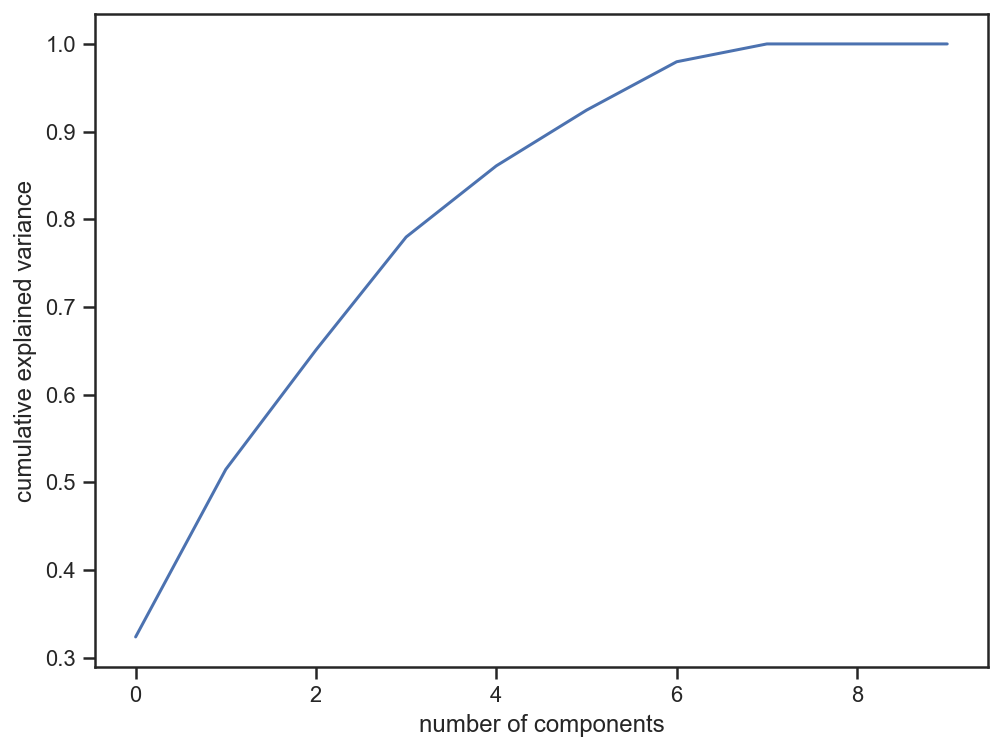

In [53]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [54]:
# Apply PCA and keep the first seven principal components
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_sel)

# Output the shape of the original and reduced data
print("Original shape: {}".format(str(X_sel.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (37041, 10)
Reduced shape: (37041, 7)


In [55]:
column_names = X_sel.columns  
X_pca = pd.DataFrame(X_pca, columns=column_names[:7])  # Modify the column names to select the first 7 columns
X_pca.head()

,mileage,standard_make,standard_model,vehicle_condition,body_type,fuel_type,car_age
0,-0.581234,0.073263,-0.122757,-0.430960,0.521774,-1.187889,1.318399
1,-0.634089,-0.004160,1.482170,1.107970,0.186697,-1.276893,-0.694574
2,-0.426776,-0.185170,-0.253256,-0.557854,-0.400575,-1.210912,0.540528
3,-0.411403,-0.452089,0.179024,0.145612,0.700530,-0.382984,0.466054
4,-0.452978,-0.197993,0.507280,0.159244,-0.496281,-1.192712,0.032505


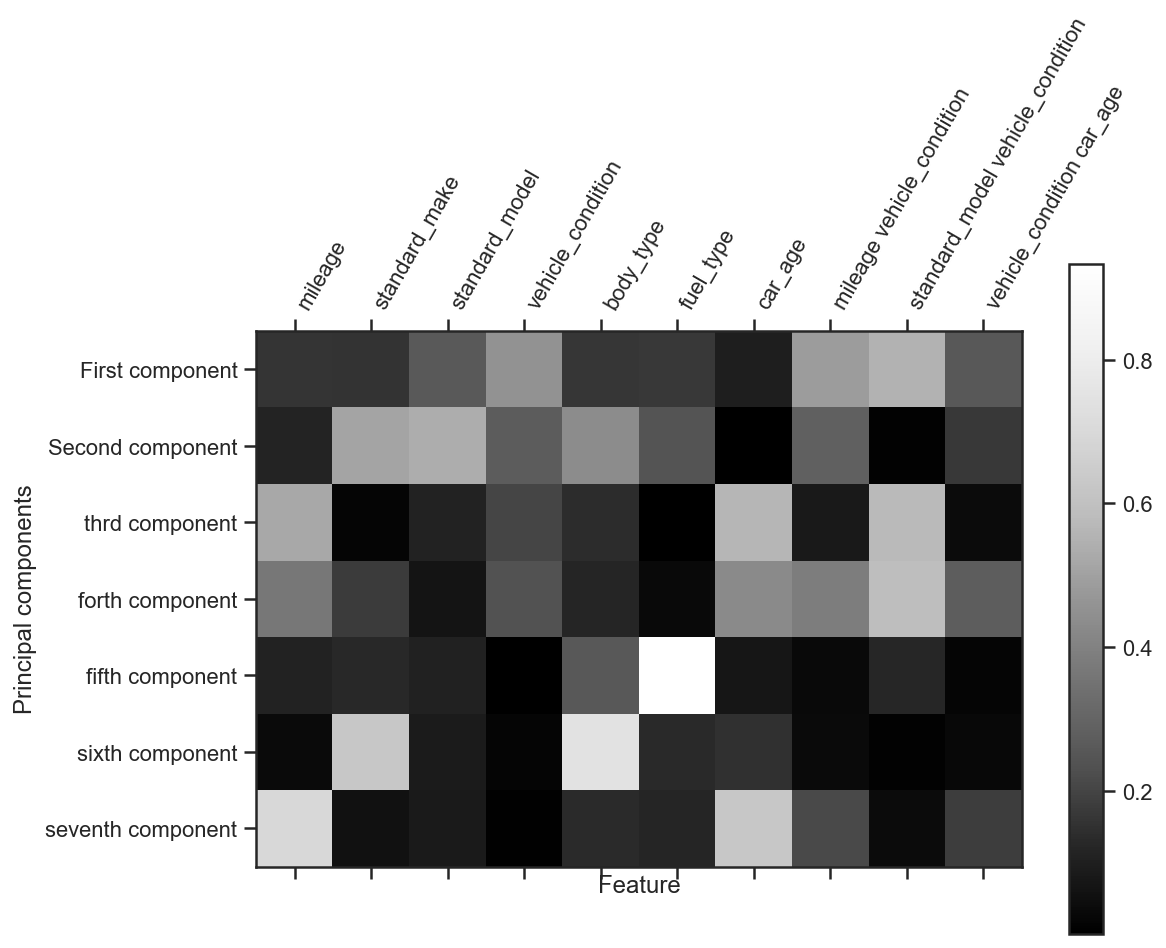

In [56]:
# Visualize the absolute values of the PCA components
plt.matshow(np.abs(pca.components_), cmap='Greys_r')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ["First component", "Second component", "thrd component", "forth component", "fifth component", "sixth component", "seventh component"])
plt.colorbar()
plt.xticks(range(len(X_sel.columns)), X_sel.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

In [57]:
c1_df = pd.Series(pca.components_[0], index=X_sel.columns)
c1_df.abs().sort_values(ascending=False)

standard_model vehicle_condition    0.551922
mileage vehicle_condition           0.487998
vehicle_condition                   0.453884
standard_model                      0.262433
vehicle_condition car_age           0.258279
fuel_type                           0.171436
body_type                           0.162881
mileage                             0.160371
standard_make                       0.155643
car_age                             0.098924
dtype: float64

In [58]:
c2_df = pd.Series(pca.components_[1], index=X_sel.columns)
c2_df.abs().sort_values(ascending=False)

standard_model                      0.536601
standard_make                       0.510492
body_type                           0.438172
mileage vehicle_condition           0.287643
vehicle_condition                   0.272997
fuel_type                           0.242926
vehicle_condition car_age           0.171869
mileage                             0.116311
standard_model vehicle_condition    0.010168
car_age                             0.003630
dtype: float64

In [59]:
c3_df = pd.Series(pca.components_[2], index=X_sel.columns)
c3_df.abs().sort_values(ascending=False)

standard_model vehicle_condition    0.573068
car_age                             0.562970
mileage                             0.522830
vehicle_condition                   0.202023
body_type                           0.138065
standard_model                      0.111873
mileage vehicle_condition           0.083696
vehicle_condition car_age           0.038507
standard_make                       0.020118
fuel_type                           0.004784
dtype: float64

In [60]:
c4_df = pd.Series(pca.components_[3], index=X_sel.columns)
c4_df.abs().sort_values(ascending=False)

standard_model vehicle_condition    0.588955
car_age                             0.430794
mileage vehicle_condition           0.386191
mileage                             0.367066
vehicle_condition car_age           0.276500
vehicle_condition                   0.235359
standard_make                       0.179643
body_type                           0.118033
standard_model                      0.068336
fuel_type                           0.030795
dtype: float64

In [61]:
c5_df = pd.Series(pca.components_[4], index=X_sel.columns)
c5_df.abs().sort_values(ascending=False)

fuel_type                           0.933298
body_type                           0.257627
standard_make                       0.126933
standard_model vehicle_condition    0.123172
mileage                             0.113606
standard_model                      0.108462
car_age                             0.071552
mileage vehicle_condition           0.031990
vehicle_condition car_age           0.022023
vehicle_condition                   0.001362
dtype: float64

In [62]:
c6_df = pd.Series(pca.components_[5], index=X_sel.columns)
c6_df.abs().sort_values(ascending=False)

body_type                           0.747443
standard_make                       0.624735
car_age                             0.148770
fuel_type                           0.129971
standard_model                      0.089184
mileage vehicle_condition           0.036427
mileage                             0.035110
vehicle_condition car_age           0.030011
vehicle_condition                   0.022077
standard_model vehicle_condition    0.010412
dtype: float64

In [63]:
c7_df = pd.Series(pca.components_[6], index=X_sel.columns)
c7_df.abs().sort_values(ascending=False)

mileage                             0.696712
car_age                             0.625374
mileage vehicle_condition           0.212532
vehicle_condition car_age           0.181458
body_type                           0.135444
fuel_type                           0.120063
standard_model                      0.087379
standard_make                       0.059198
standard_model vehicle_condition    0.038390
vehicle_condition                   0.005503
dtype: float64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=0)

In [140]:
X_train.mean()

mileage             -0.004419
standard_make        0.002212
standard_model       0.005429
vehicle_condition    0.001037
body_type           -0.002288
fuel_type           -0.001561
car_age             -0.000125
dtype: float64

In [141]:
X_test.mean()

mileage              0.013257
standard_make       -0.006634
standard_model      -0.016285
vehicle_condition   -0.003112
body_type            0.006863
fuel_type            0.004683
car_age              0.000374
dtype: float64

In [65]:
lgr = LinearRegression()
rfr = RandomForestRegressor()
hgbr = HistGradientBoostingRegressor()

In [66]:
lgr.fit(X_train, y_train)


LinearRegression()

In [131]:
r2_score(y_true, lgr.predict(X_test))

0.7742821409703371

In [67]:
rfr.fit(X_train, y_train)


RandomForestRegressor()

In [132]:
r2_score(y_true, rfr.predict(X_test))

0.9103529140752232

In [68]:
hgbr.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [133]:
r2_score(y_true, hgbr.predict(X_test))

0.8942437342446378

In [134]:
mean_squared_error(y_test, lgr.predict(X_test), squared=False)

4494.032535332149

In [135]:
mean_squared_error(y_test, rfr.predict(X_test), squared=False)

2832.1831822058025

In [136]:
mean_squared_error(y_test, hgbr.predict(X_test), squared=False)

3076.1414722905747

In [69]:
# Define the parameter grid for hyperparameter tuning
param_grid_lgr = {'fit_intercept':[True,False], 'copy_X':[True, False]}
param_grid_rfr = {'n_estimators': [50, 100, 150, 200, 300], 'max_depth': [None, 5, 10, 15, 20, 25, 30]}
param_grid_hgbr = {'learning_rate': [0.5, 0.1, 0.05, 0.01], 'max_depth': [2, 3, 5, 7, 9]}

In [70]:
# Perform GridSearchCV to tune the hyperparameters
grid_lgr = GridSearchCV(lgr, param_grid_lgr, scoring='neg_mean_squared_error', cv=5)
grid_rfr = GridSearchCV(rfr, param_grid_rfr, scoring='neg_mean_squared_error', cv=5)
grid_hgbr = GridSearchCV(hgbr, param_grid_hgbr, scoring='neg_mean_squared_error', cv=5)

In [71]:
# Fit the models with hyperparameter tuning
grid_lgr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [72]:
grid_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_squared_error')

In [73]:
grid_hgbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.5, 0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 5, 7, 9]},
             scoring='neg_mean_squared_error')

In [74]:
best_lgr_params = grid_lgr.best_params_
best_rfr_params = grid_rfr.best_params_
best_hgbr_params = grid_hgbr.best_params_

In [75]:
# Select the best performing models
best_lgr = LinearRegression(**best_lgr_params)

In [76]:
best_rfr = RandomForestRegressor(**best_rfr_params)

In [77]:
best_hgbr = HistGradientBoostingRegressor(**best_hgbr_params)

In [78]:
best_lgr.fit(X_train, y_train)

LinearRegression()

In [79]:
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200)

In [80]:
best_hgbr.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.5, max_depth=7)

In [81]:
lgr_pred = best_lgr.predict(X_test)
rfr_pred = best_rfr.predict(X_test)
hgbr_pred = best_hgbr.predict(X_test)

In [82]:
# Calculate the root mean squared error (RMSE)
lgr_rmse = mean_squared_error(y_test, lgr_pred, squared=False)
lgr_rmse

4494.032535332149

In [83]:
rfr_rmse = mean_squared_error(y_test, rfr_pred, squared=False)
rfr_rmse

2819.203755026973

In [84]:
hgbr_rmse = mean_squared_error(y_test, hgbr_pred, squared=False)
hgbr_rmse

2873.58479422961

In [85]:
scores = cross_val_score(best_lgr, X_train, y_train, cv=10, scoring='r2')
scores.mean(), scores.std()

(0.7538851915645111, 0.04523368525058262)

In [86]:
scores = cross_val_score(best_rfr, X_train, y_train, cv=10, scoring='r2')
scores.mean(), scores.std()

(0.9021588110794525, 0.0055634885696033524)

In [87]:
scores = cross_val_score(best_hgbr, X_train, y_train, cv=10, scoring='r2')
scores.mean(), scores.std()

(0.896769043574654, 0.006152879850658164)

In [137]:
scores = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='r2')
scores.mean(), scores.std()

(0.8874686059523036, 0.006924320851031057)

In [88]:
ensembled = [ best_lgr, best_rfr, best_hgbr ]

In [89]:
for est in ensembled:
    est.fit(X_train, y_train)

In [90]:
ensemble = VotingRegressor(
    [
        ("lgr", best_lgr), 
        ("rfr", best_rfr), 
        ("hbgr", best_hgbr)
    ]
)
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('lgr', LinearRegression()),
                            ('rfr',
                             RandomForestRegressor(max_depth=15,
                                                   n_estimators=200)),
                            ('hbgr',
                             HistGradientBoostingRegressor(learning_rate=0.5,
                                                           max_depth=7))])

In [91]:
ensemble_pred = ensemble.predict(X_test)
ensemble_rmse = mean_squared_error(y_test, ensemble_pred, squared=False)
ensemble_rmse

3039.5357246385515

In [92]:
y_true = y_test

In [93]:
r2_score(y_true, lgr_pred)

0.7742821409703371

In [94]:
r2_score(y_true, rfr_pred)

0.9111727068141873

In [95]:
r2_score(y_true, hgbr_pred)

0.9077127868462219

In [96]:
r2_score(y_true, ensemble_pred)

0.8967457344056617

In [97]:
all_regr = ensembled + [ ensemble ]

In [98]:
for est in all_regr:
    scores = cross_val_score(est, X_train, y_train, cv=5, scoring='r2')
    print(scores.mean(), scores.std())

0.7558587186372558 0.026159851168437515
0.8985123027804729 0.0037647920100143334
0.8950671756370443 0.004976290732215364
0.8844085119570826 0.004467527576419592


In [99]:
for est in all_regr:
    y_pred = est.predict(X_train)
    score = r2_score(y_train, y_pred)
    print(score)

0.7678117115181543
0.9690199223119771
0.9378427182759678
0.9266679968864042


In [100]:
for est in all_regr:
    y_true = y_test
    y_pred = est.predict(X_test)
    score = r2_score(y_true, y_pred)
    print(score)

0.7742821409703371
0.9107112889800625
0.9054944266444038
0.8967457344056617


In [123]:
xt = X_test.head(20)
pred1 = best_lgr.predict(xt)
pred2 = best_rfr.predict(xt)
pred3 = best_hgbr.predict(xt)
pred4 = ensemble.predict(xt)

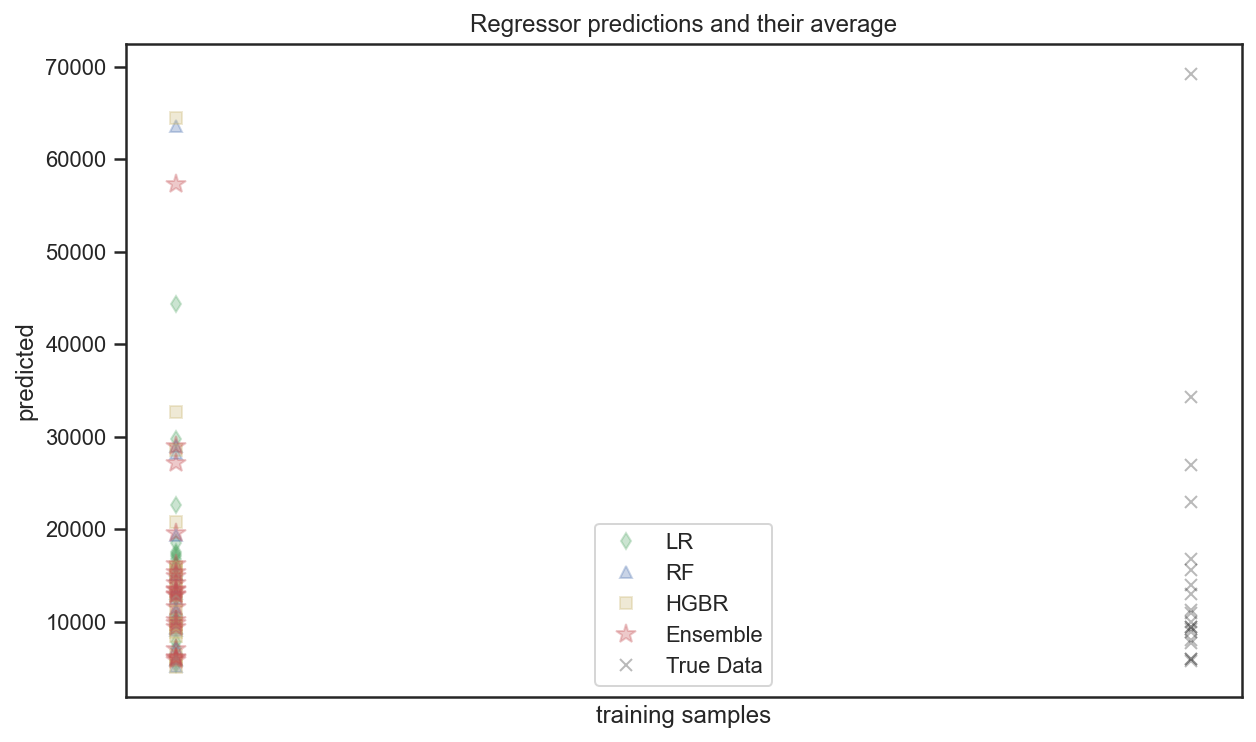

In [128]:
plt.figure(figsize=(10,6))
plt.plot(pred1, "gd", alpha=0.3, label="LR")
plt.plot(pred2, "b^", alpha=0.3, label="RF")
plt.plot(pred3, "ys", alpha=0.3, label="HGBR")
plt.plot(pred4, "r*", alpha=0.3, ms=10, label="Ensemble")
plt.plot(y_test.head(20), "kx", alpha=0.3, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [103]:
# define a function to create a bar plot of feature importances to identify the most important features in the dataset
def plot_rf_feat_imp_barh(best_rfr, feat_names, ax=None, top_feat_k=10, style_kws={}):
    """ """
    if ax is None:
        fig, ax = plt.subplots()
    
    return pd.Series(
        best_rfr.feature_importances_, 
        index=feat_names
    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

<AxesSubplot:>

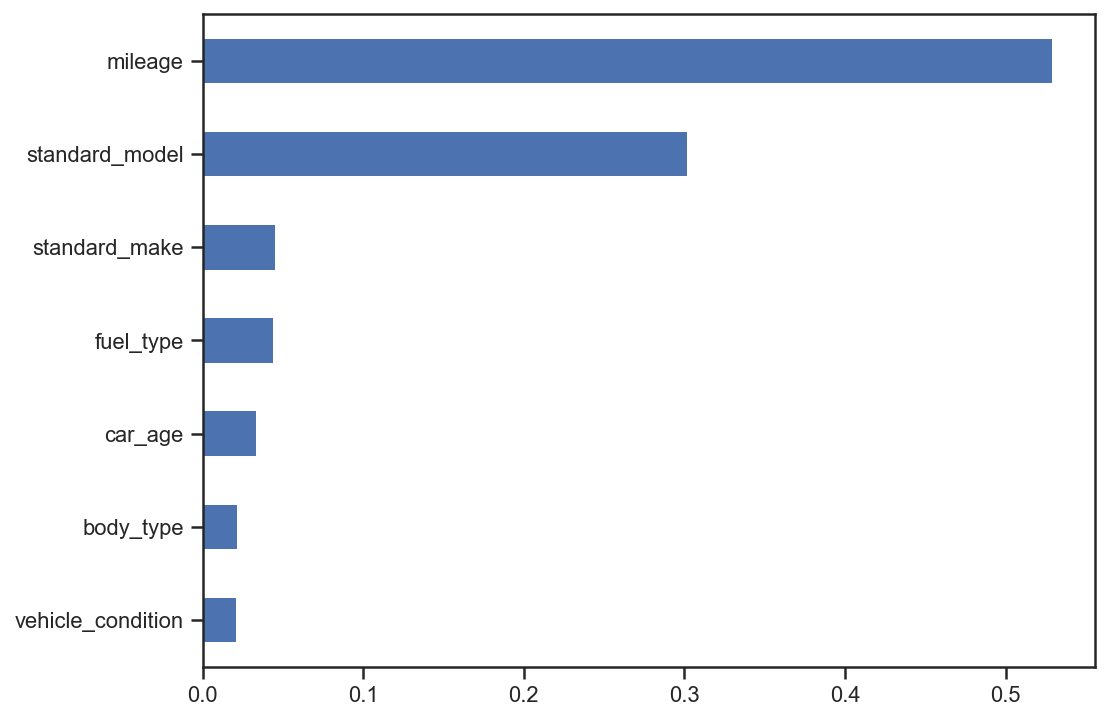

In [104]:
plot_rf_feat_imp_barh(best_rfr, X_test.columns)

Text(0.5, 1.0, 'True vs Predicted Values')

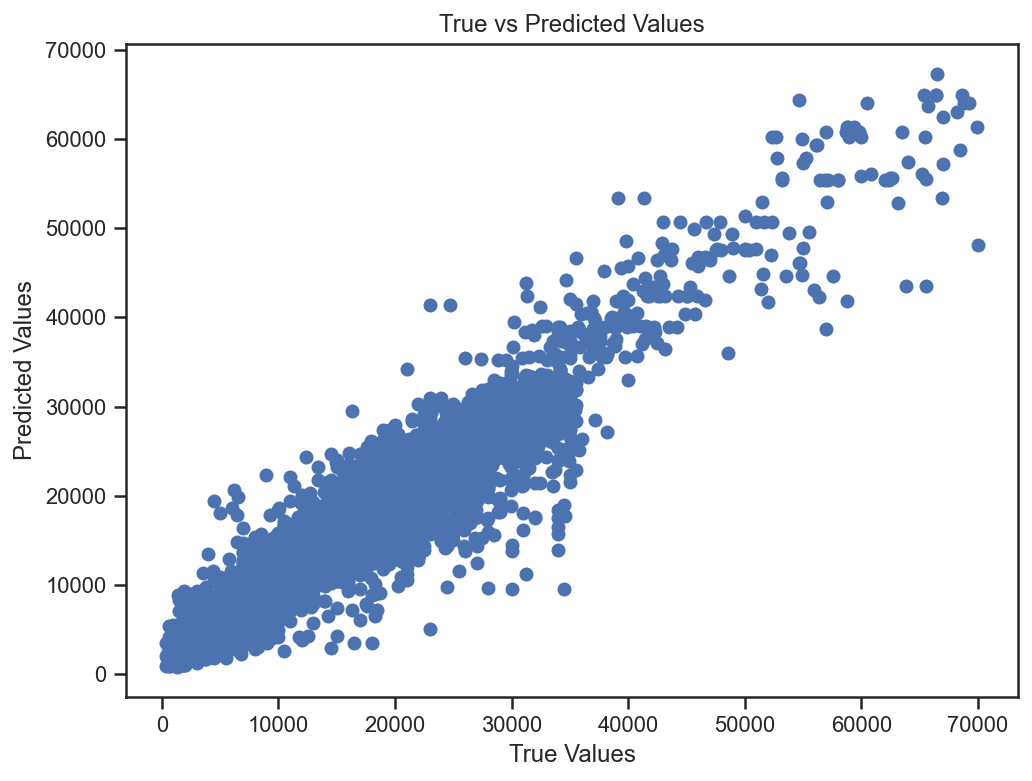

In [105]:
# create scatter plot to analyze true vs predicted values
plt.scatter(y_true, rfr_pred)

# add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

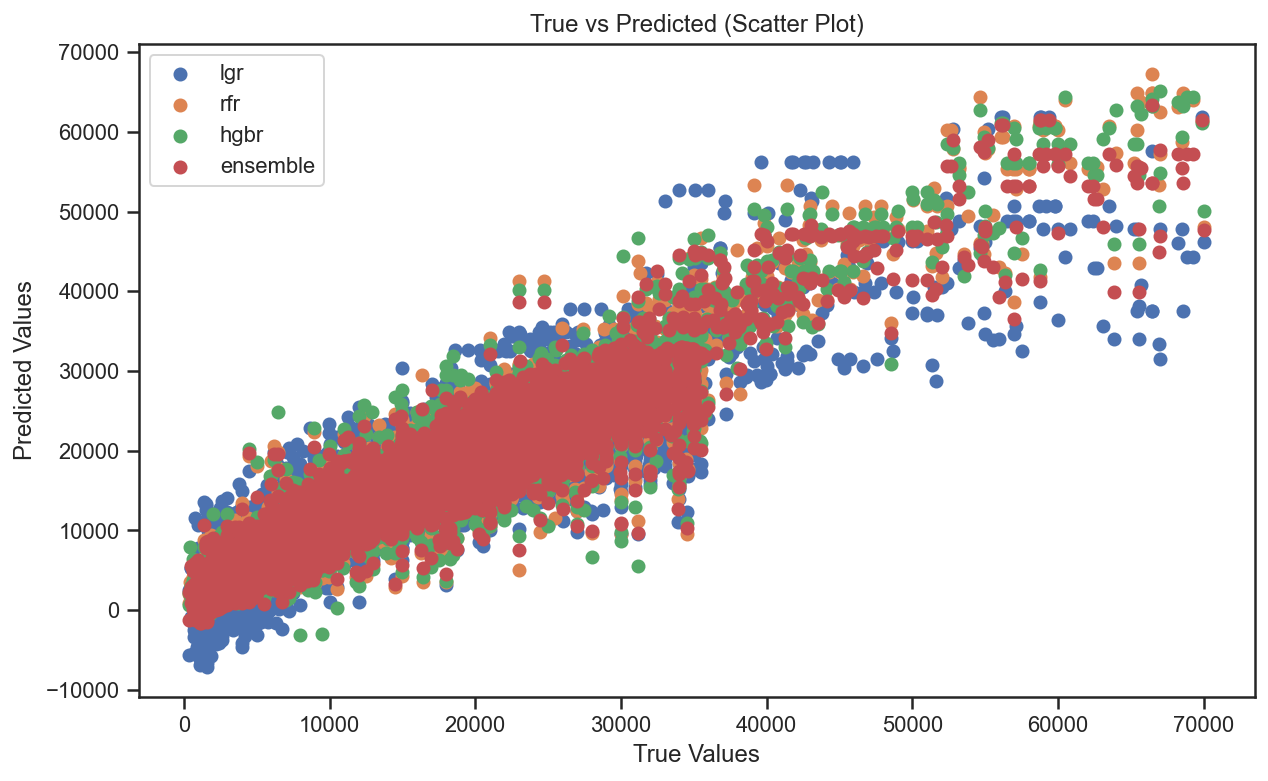

In [129]:
plt.figure(figsize=(10, 6))

# Scatter Plot
plt.scatter(y_true, lgr_pred, label='lgr')
plt.scatter(y_true, rfr_pred, label='rfr')
plt.scatter(y_true, hgbr_pred, label='hgbr')
plt.scatter(y_true, ensemble_pred, label='ensemble')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted (Scatter Plot)')
plt.legend()

plt.show()

In [106]:
!pip install -q shap
import shap
shap.initjs()

In [107]:
# Create a TreeExplainer for the Random Forest Regression model
explainer = shap.TreeExplainer(best_rfr)

In [108]:
# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

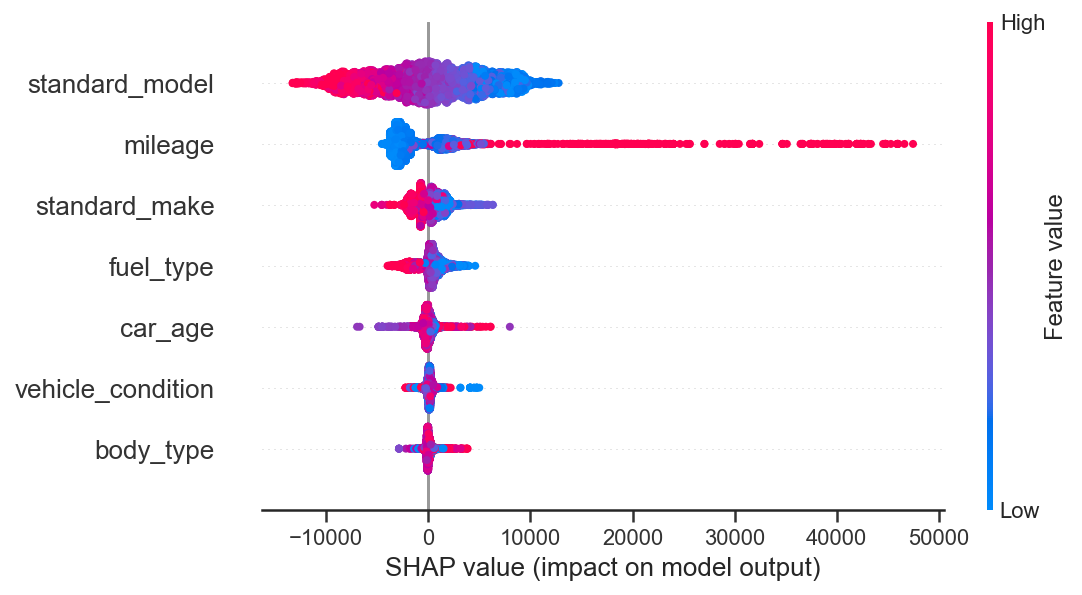

In [110]:
# Global Explainability: Plot summary of SHAP values
shap.summary_plot(shap_values, X_test)

In [139]:
row_idx = 0
shap.force_plot(
    explainer.expected_value, 
    shap_values[row_idx],
    features=X_test.columns
)


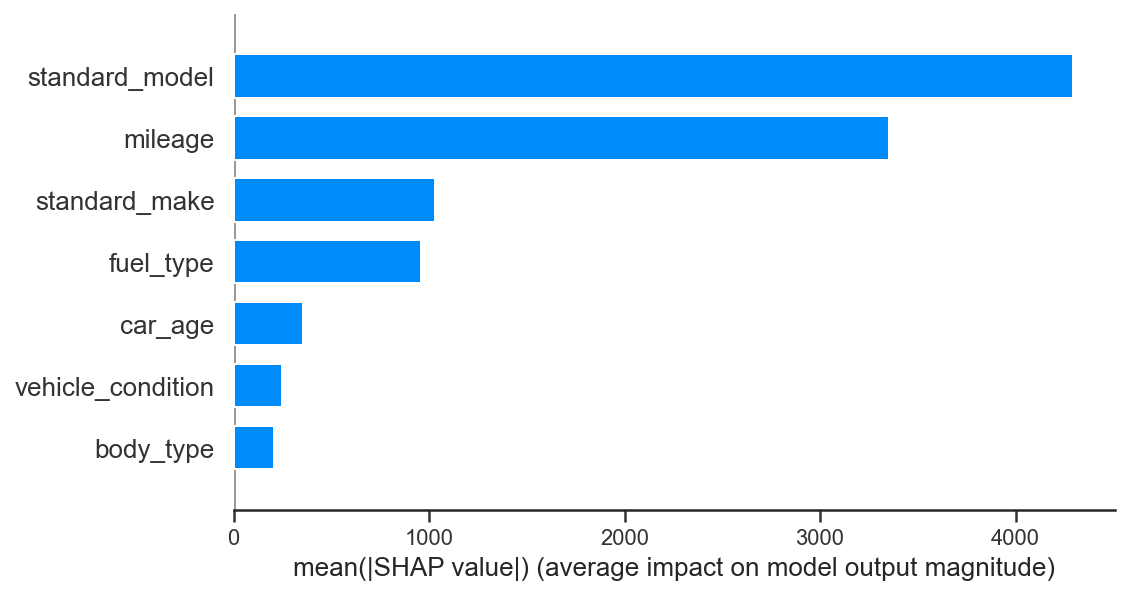

In [113]:
shap.summary_plot(
    shap_values, plot_type="bar", features=X_test.columns
)

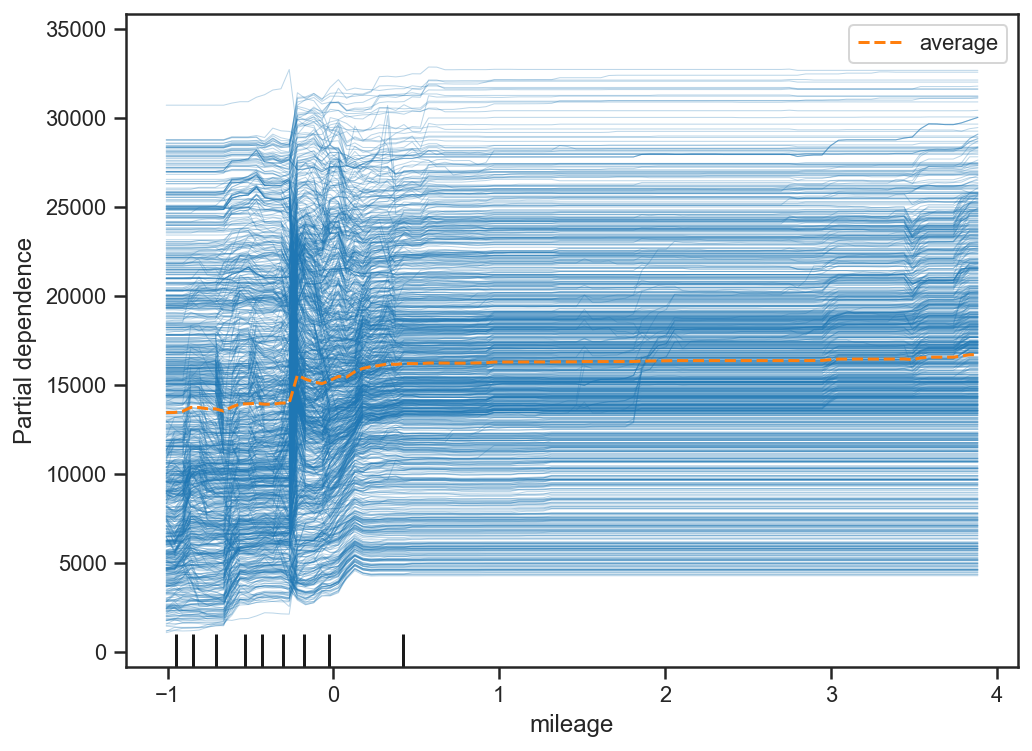

In [115]:
# Create partial dependency plots for selected features
PartialDependenceDisplay.from_estimator(
    best_rfr, X_test, features=['mileage'], kind='both'
)

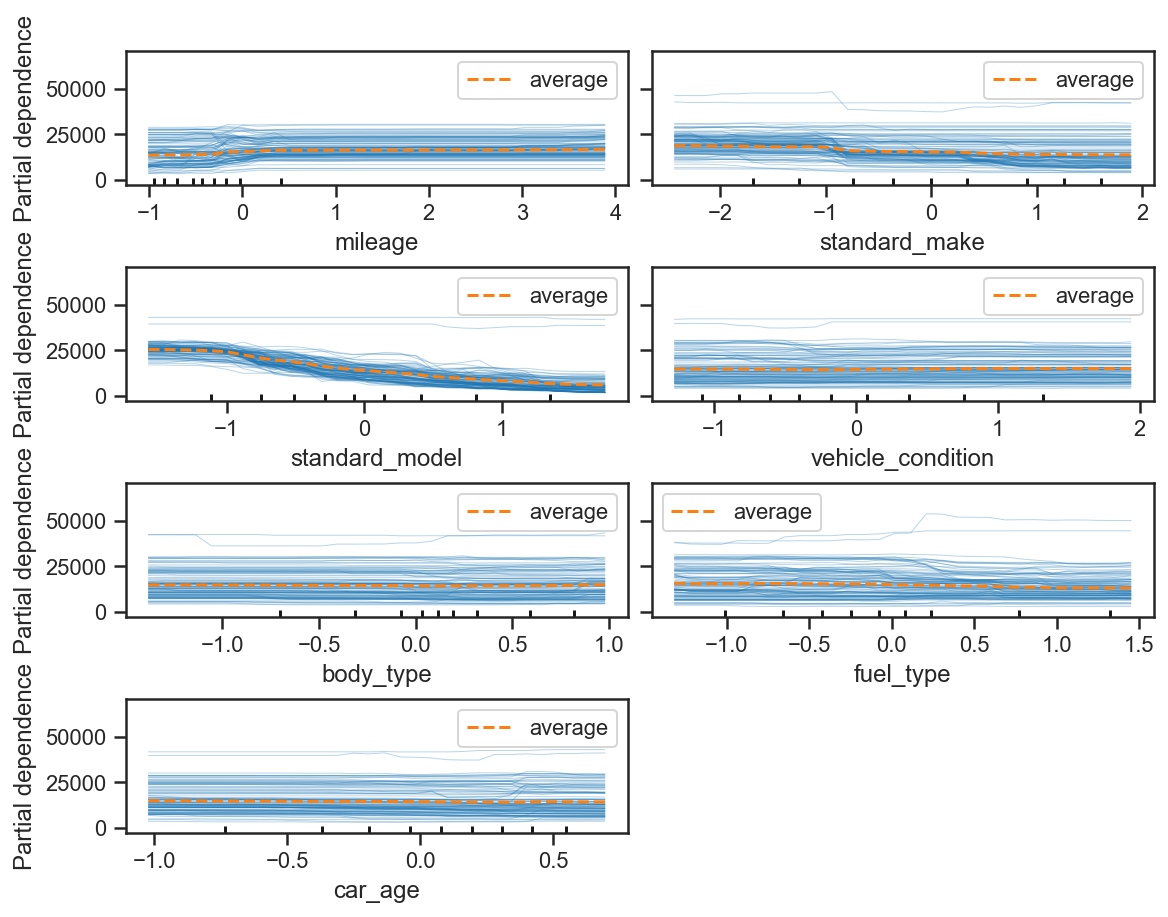

In [116]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    best_rfr, X_test, features=X_test.select_dtypes(exclude='object').columns,
    kind='both',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

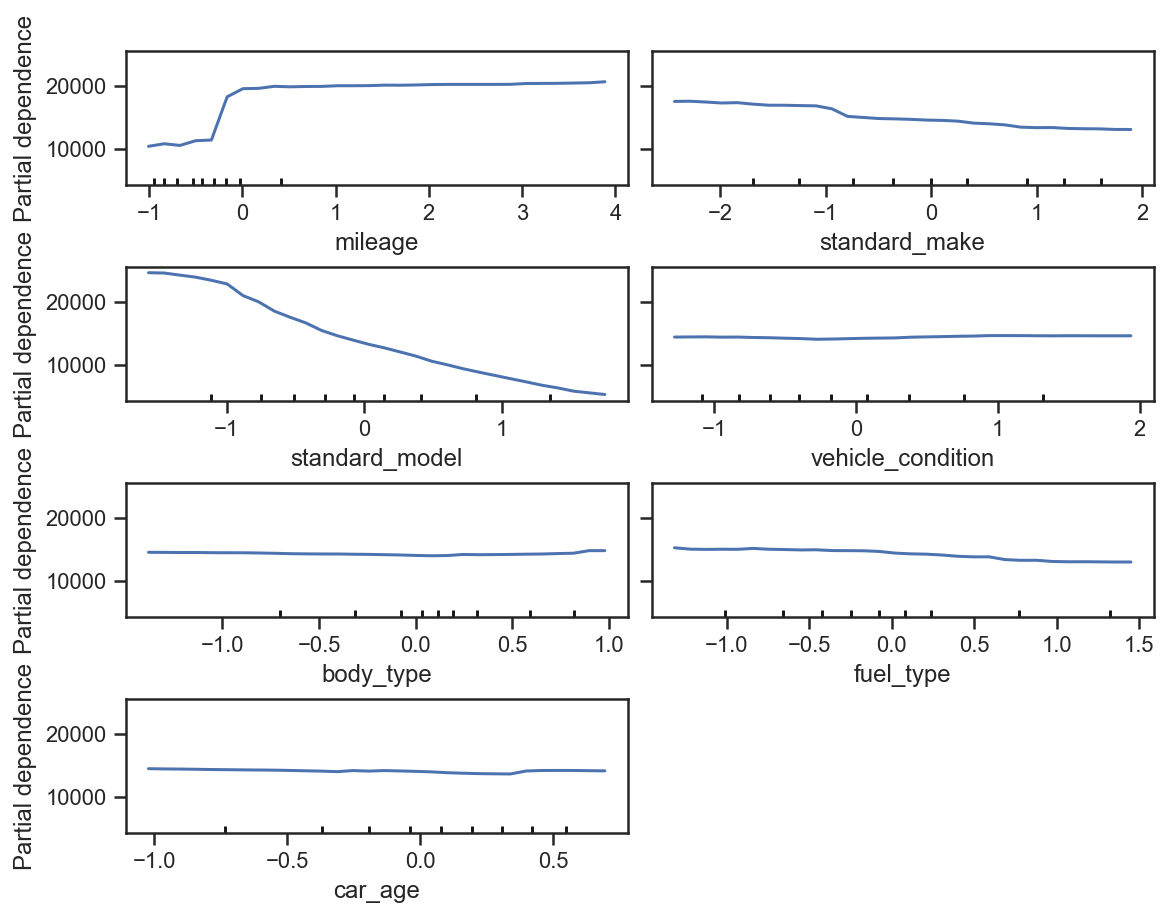

In [117]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    best_rfr, X_test, features=X_test.select_dtypes(exclude='object').columns,
    kind='average', 
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);